# Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor.To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

# Business Goal

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

# Import libraries

In [127]:
#import pandas library
import numpy as np,pandas as pd
#import Data visualisation library
import seaborn as sns,matplotlib.pyplot as plt


# Data display coustomization
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [219]:
#avoid warning messages
import warnings
warnings.filterwarnings('ignore')

# Read and understand data

In [128]:
df=pd.read_csv('Leads.csv')

In [129]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [130]:
#shape
df.shape

(9240, 37)

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [132]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [133]:
df.describe(include='all')

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,9240,9240.000000,9240,9204,9240,9240,9240.000000,9103.000000,9240.000000,9103.000000,9137,6779,7802,7033,6550,6531,9240,9240,9240,9240,9240,9240,9240,9240,5887,4473,9240,9240,6531,7820,5022,5022,5022.000000,5022.000000,9240,9240,9240
unique,9240,NaN,5,21,2,2,NaN,NaN,NaN,NaN,17,38,19,10,6,3,2,1,2,2,2,2,2,1,26,5,1,1,6,7,3,3,NaN,NaN,1,2,16
top,7927b2df-8bba-4d29-b9a2-b6e0beafe620,NaN,Landing Page Submission,Google,No,No,NaN,NaN,NaN,NaN,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,02.Medium,NaN,NaN,No,No,Modified
freq,1,NaN,4886,2868,8506,9238,NaN,NaN,NaN,NaN,3437,6492,1942,5043,5600,6528,9226,9240,9238,9239,9239,9236,9233,9240,2072,1560,9240,9240,4146,3222,3839,2788,NaN,NaN,9240,6352,3407
mean,NaN,617188.435606,NaN,NaN,NaN,NaN,0.385390,3.445238,487.698268,2.362820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.306252,16.344883,NaN,NaN,NaN
std,NaN,23405.995698,NaN,NaN,NaN,NaN,0.486714,4.854853,548.021466,2.161418,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.386694,1.811395,NaN,NaN,NaN
min,NaN,579533.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,11.000000,NaN,NaN,NaN
25%,NaN,596484.500000,NaN,NaN,NaN,NaN,0.000000,1.000000,12.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.000000,15.000000,NaN,NaN,NaN
50%,NaN,615479.000000,NaN,NaN,NaN,NaN,0.000000,3.000000,248.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.000000,16.000000,NaN,NaN,NaN
75%,NaN,637387.250000,NaN,NaN,NaN,NaN,1.000000,5.000000,936.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.000000,18.000000,NaN,NaN,NaN


# Inspecting the DataFrame

* Data Cleaning

In [348]:
#Replace "select" with "nan" in columns
df1=df.replace(['select','Select'],np.nan)

In [349]:
#check percentage of missing values in each columns
missing=100*df1.isnull().mean().nlargest(30)

In [350]:
missing

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
Lead Quality                                     51.590909
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Index                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Score                       45.649351
City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

In [351]:
#drop columns with missing value percentage greater than 40
for i in missing.index:
    if 100*df1[i].isna().mean()>40:
        df1.drop(i,axis=1,inplace=True)

In [352]:
#drop unneccessassary columns

df1.drop(['Lead Number','Prospect ID'],axis=1,inplace=True)

In [353]:
missing=100*df1.isna().mean()

In [354]:
missing.nlargest(15)

City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Lead Origin                                       0.000000
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
Total Time Spent on Website                       0.000000
dtype: float64

In [355]:
df1['City'].mode()[0]

'Mumbai'

In [356]:
df1['City'].isna().sum()

3669

In [357]:
df1['City'].unique()

array([nan, 'Mumbai', 'Thane & Outskirts', 'Other Metro Cities',
       'Other Cities', 'Other Cities of Maharashtra', 'Tier II Cities'],
      dtype=object)

In [358]:
df1['City'].value_counts()

City
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: count, dtype: int64

In [359]:
df1['City'].fillna(df1['City'].mode()[0],inplace=True)

In [360]:
df1['City'].isna().sum()

0

In [361]:
df1['Specialization'].describe()

count                   5860
unique                    18
top       Finance Management
freq                     976
Name: Specialization, dtype: object

In [362]:
df1['Specialization'].value_counts()

Specialization
Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: count, dtype: int64

In [363]:
df1['Specialization'].fillna(df1['Specialization'].mode()[0],inplace=True)

In [364]:
df1.isna().sum().nlargest(10)

Tags                                             3353
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Lead Origin                                         0
Do Not Email                                        0
dtype: int64

In [365]:
df1['Tags'].value_counts()

Tags
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to O

In [366]:
df1.drop('Tags',axis=1,inplace=True)

In [367]:
df1.isna().sum().nlargest(10)

What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Lead Origin                                         0
Do Not Email                                        0
Do Not Call                                         0
dtype: int64

In [368]:
df1['What matters most to you in choosing a course'].value_counts()

What matters most to you in choosing a course
Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

In [369]:
df1['What matters most to you in choosing a course'].fillna(df1['What matters most to you in choosing a course'].mode()[0],inplace=True)

In [370]:
df1['What matters most to you in choosing a course'].value_counts()

What matters most to you in choosing a course
Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

In [371]:
df1['What is your current occupation'].value_counts()

What is your current occupation
Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

In [372]:
df1['What is your current occupation'].fillna(df1['What is your current occupation'].mode()[0],inplace=True)

In [373]:
100*df1.isna().mean().sort_values(ascending=False)

Country                                          26.634199
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Lead Origin                                       0.000000
X Education Forums                                0.000000
A free copy of Mastering The Interview            0.000000
I agree to pay the amount through cheque          0.000000
City                                              0.000000
Get updates on DM Content                         0.000000
Update me on Supply Chain Content                 0.000000
Receive More Updates About Our Courses            0.000000
Through Recommendations                           0.000000
Digital Advertisement                             0.000000
Newspaper                                         0.000000
Search                                            0.0000

In [374]:
df1['Country'].fillna(df1['Country'].mode()[0],inplace=True)

In [375]:
100*df1.isna().mean().sort_values(ascending=False)

TotalVisits                                      1.482684
Page Views Per Visit                             1.482684
Last Activity                                    1.114719
Lead Source                                      0.389610
Lead Origin                                      0.000000
X Education Forums                               0.000000
A free copy of Mastering The Interview           0.000000
I agree to pay the amount through cheque         0.000000
City                                             0.000000
Get updates on DM Content                        0.000000
Update me on Supply Chain Content                0.000000
Receive More Updates About Our Courses           0.000000
Through Recommendations                          0.000000
Digital Advertisement                            0.000000
Newspaper                                        0.000000
Search                                           0.000000
Newspaper Article                                0.000000
Magazine      

In [376]:
df1['TotalVisits'].describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

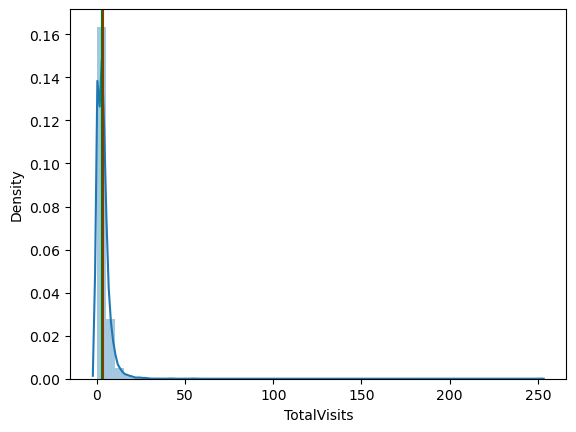

In [377]:
sns.distplot(df1['TotalVisits'])
plt.axvline(df1['TotalVisits'].mean(),color='r')
plt.axvline(df1['TotalVisits'].median(),color='g');

Obsetvation:
    
   * only slight variation in mean and meadian.So,take anyone.

In [378]:
df1['TotalVisits'].fillna(df1['TotalVisits'].mean(),inplace=True)

In [379]:
100*df1.isna().mean().sort_values(ascending=False)

Page Views Per Visit                             1.482684
Last Activity                                    1.114719
Lead Source                                      0.389610
Lead Origin                                      0.000000
Newspaper Article                                0.000000
A free copy of Mastering The Interview           0.000000
I agree to pay the amount through cheque         0.000000
City                                             0.000000
Get updates on DM Content                        0.000000
Update me on Supply Chain Content                0.000000
Receive More Updates About Our Courses           0.000000
Through Recommendations                          0.000000
Digital Advertisement                            0.000000
Newspaper                                        0.000000
X Education Forums                               0.000000
Search                                           0.000000
Magazine                                         0.000000
What matters m

In [380]:
df1['Last Activity'].value_counts()

Last Activity
Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: count, dtype: int64

In [381]:
df1.drop('Last Activity',axis=1,inplace=True)

In [382]:
df1['Page Views Per Visit'].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

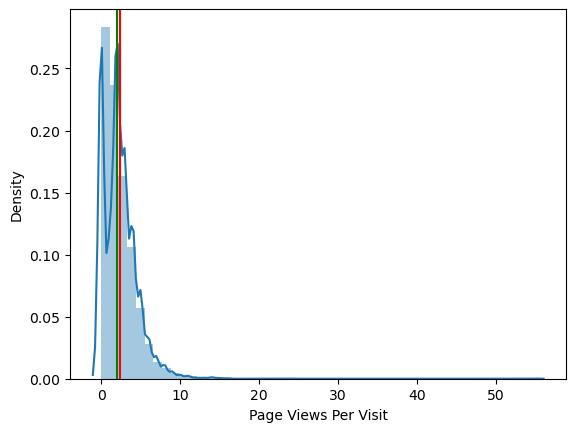

In [383]:
sns.distplot(df1['Page Views Per Visit'])
plt.axvline(df1['Page Views Per Visit'].mean(),color='r')
plt.axvline(df1['Page Views Per Visit'].median(),color='g');

In [384]:
df1['Page Views Per Visit'].fillna(df1['Page Views Per Visit'].mean(),inplace=True)

In [385]:
100*df1.isna().mean().sort_values(ascending=False)

Lead Source                                      0.38961
Lead Origin                                      0.00000
A free copy of Mastering The Interview           0.00000
I agree to pay the amount through cheque         0.00000
City                                             0.00000
Get updates on DM Content                        0.00000
Update me on Supply Chain Content                0.00000
Receive More Updates About Our Courses           0.00000
Through Recommendations                          0.00000
Digital Advertisement                            0.00000
Newspaper                                        0.00000
X Education Forums                               0.00000
Newspaper Article                                0.00000
Magazine                                         0.00000
Search                                           0.00000
What matters most to you in choosing a course    0.00000
What is your current occupation                  0.00000
Specialization                 

In [386]:
df1['Lead Source'].describe()

count       9204
unique        21
top       Google
freq        2868
Name: Lead Source, dtype: object

In [387]:
df1['Lead Source'].isna().sum()

36

In [388]:
df1=df1[~df1['Lead Source'].isna()]

In [389]:
100*df1.isna().mean().sort_values(ascending=False)

Lead Origin                                      0.0
Lead Source                                      0.0
A free copy of Mastering The Interview           0.0
I agree to pay the amount through cheque         0.0
City                                             0.0
Get updates on DM Content                        0.0
Update me on Supply Chain Content                0.0
Receive More Updates About Our Courses           0.0
Through Recommendations                          0.0
Digital Advertisement                            0.0
Newspaper                                        0.0
X Education Forums                               0.0
Newspaper Article                                0.0
Magazine                                         0.0
Search                                           0.0
What matters most to you in choosing a course    0.0
What is your current occupation                  0.0
Specialization                                   0.0
Country                                       

In [390]:
df1.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,India,Finance Management,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,India,Finance Management,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,India,Finance Management,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,No,No,Modified


# Exploratory Data Analysis

converted vs non-converted

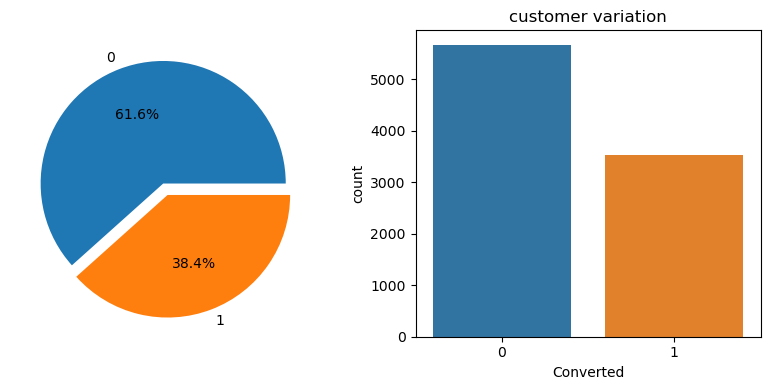

In [391]:
plt.figure(figsize=[8,4])
plt.subplot(1,2,1)
plt.pie(df1['Converted'].value_counts(),labels=df1['Converted'].value_counts().index,explode=[0,0.1],autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(x=df1['Converted'])
plt.title('customer variation')
plt.tight_layout()



Observation:
 
  * Majority peoples are non_converted.
  * Only 38.4 % customers are paying customers

Lead source vs conversion

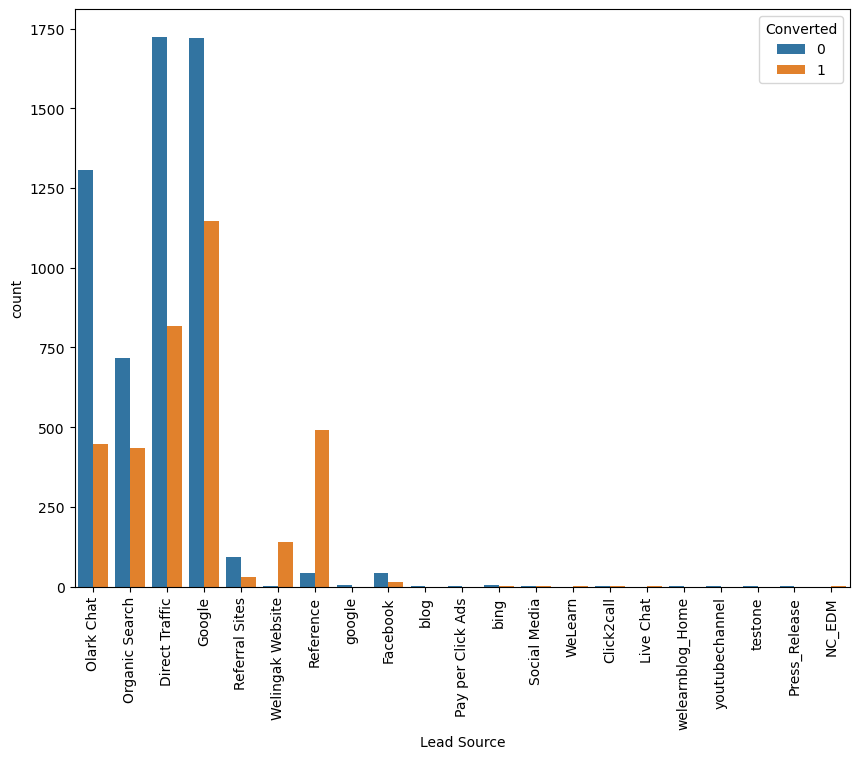

In [392]:
plt.figure(figsize=[10,7.5])
sns.countplot(df1,x='Lead Source',hue='Converted')
plt.xticks(rotation=90);

In [393]:
df1['Lead Source'] = df1['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

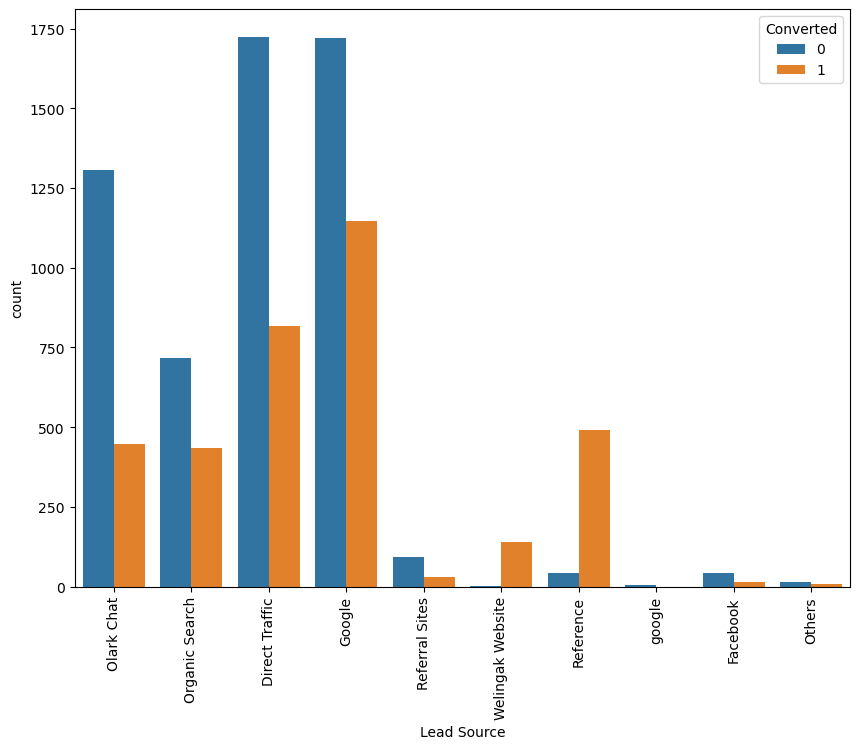

In [394]:
plt.figure(figsize=[10,7.5])
sns.countplot(df1,x='Lead Source',hue='Converted')
plt.xticks(rotation=90);

Observation:
    
   * Google and Direct Traffic gives maximum number of leads
    
   * converted customers are higher compared with non converted customers in both Welingak Website and Reference

Lead Origin vs coversion

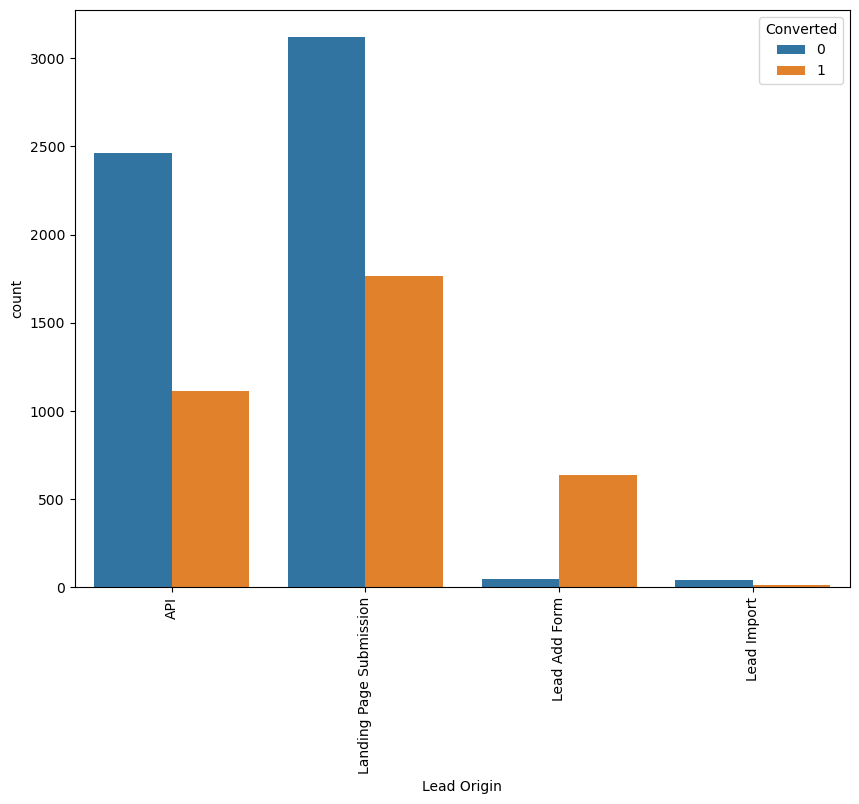

In [395]:
plt.figure(figsize=[10,7.5])
sns.countplot(df1,x='Lead Origin',hue='Converted')
plt.xticks(rotation=90);

Observations:
    
   * Higher number of leads provide by Landing Page Submission
    
   * Lead Add Form has converted customers more compared with non converted customers

Speciliazation vs conversion

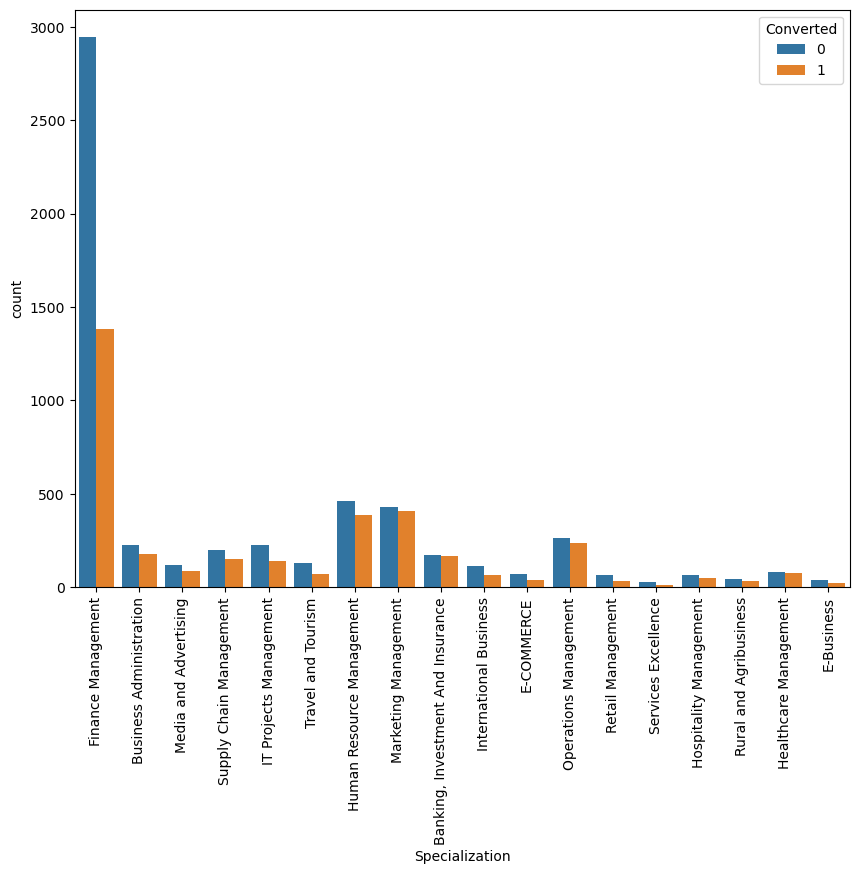

In [396]:
plt.figure(figsize=[10,7.5])
sns.countplot(df1,x='Specialization',hue='Converted')
plt.xticks(rotation=90);

Observation:
    
   * majority leads from Finance Management background customers

Occupation vs conversion

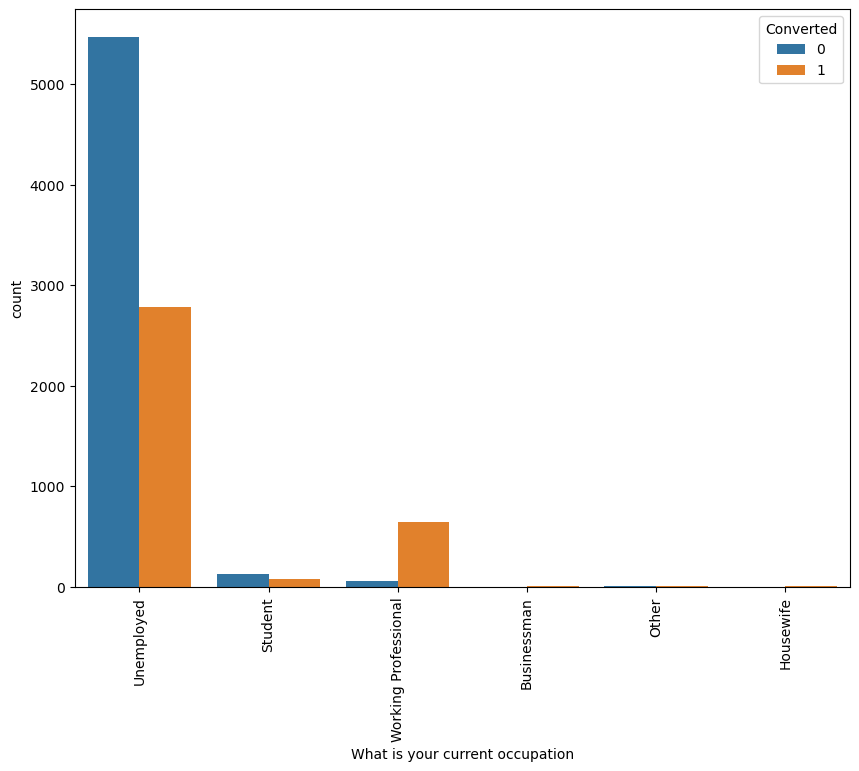

In [397]:
plt.figure(figsize=[10,7.5])
sns.countplot(df1,x='What is your current occupation',hue='Converted')
plt.xticks(rotation=90);

Observation:
  
  * Majority leads from unemployed who wants to choose course for job.
  * In Working Professional,majority are converted customers.

Reason vs conversion

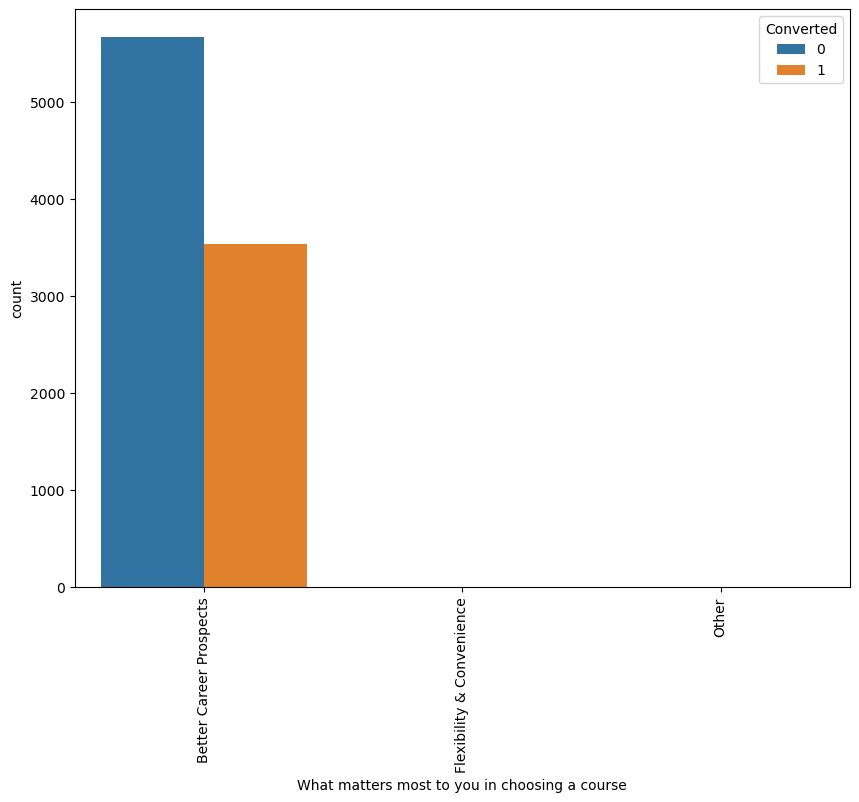

In [398]:
plt.figure(figsize=[10,7.5])
sns.countplot(df1,x='What matters most to you in choosing a course',hue='Converted')
plt.xticks(rotation=90);

Observation:
    
  * Maximum leads based on better career prospects

City and country vs conversion

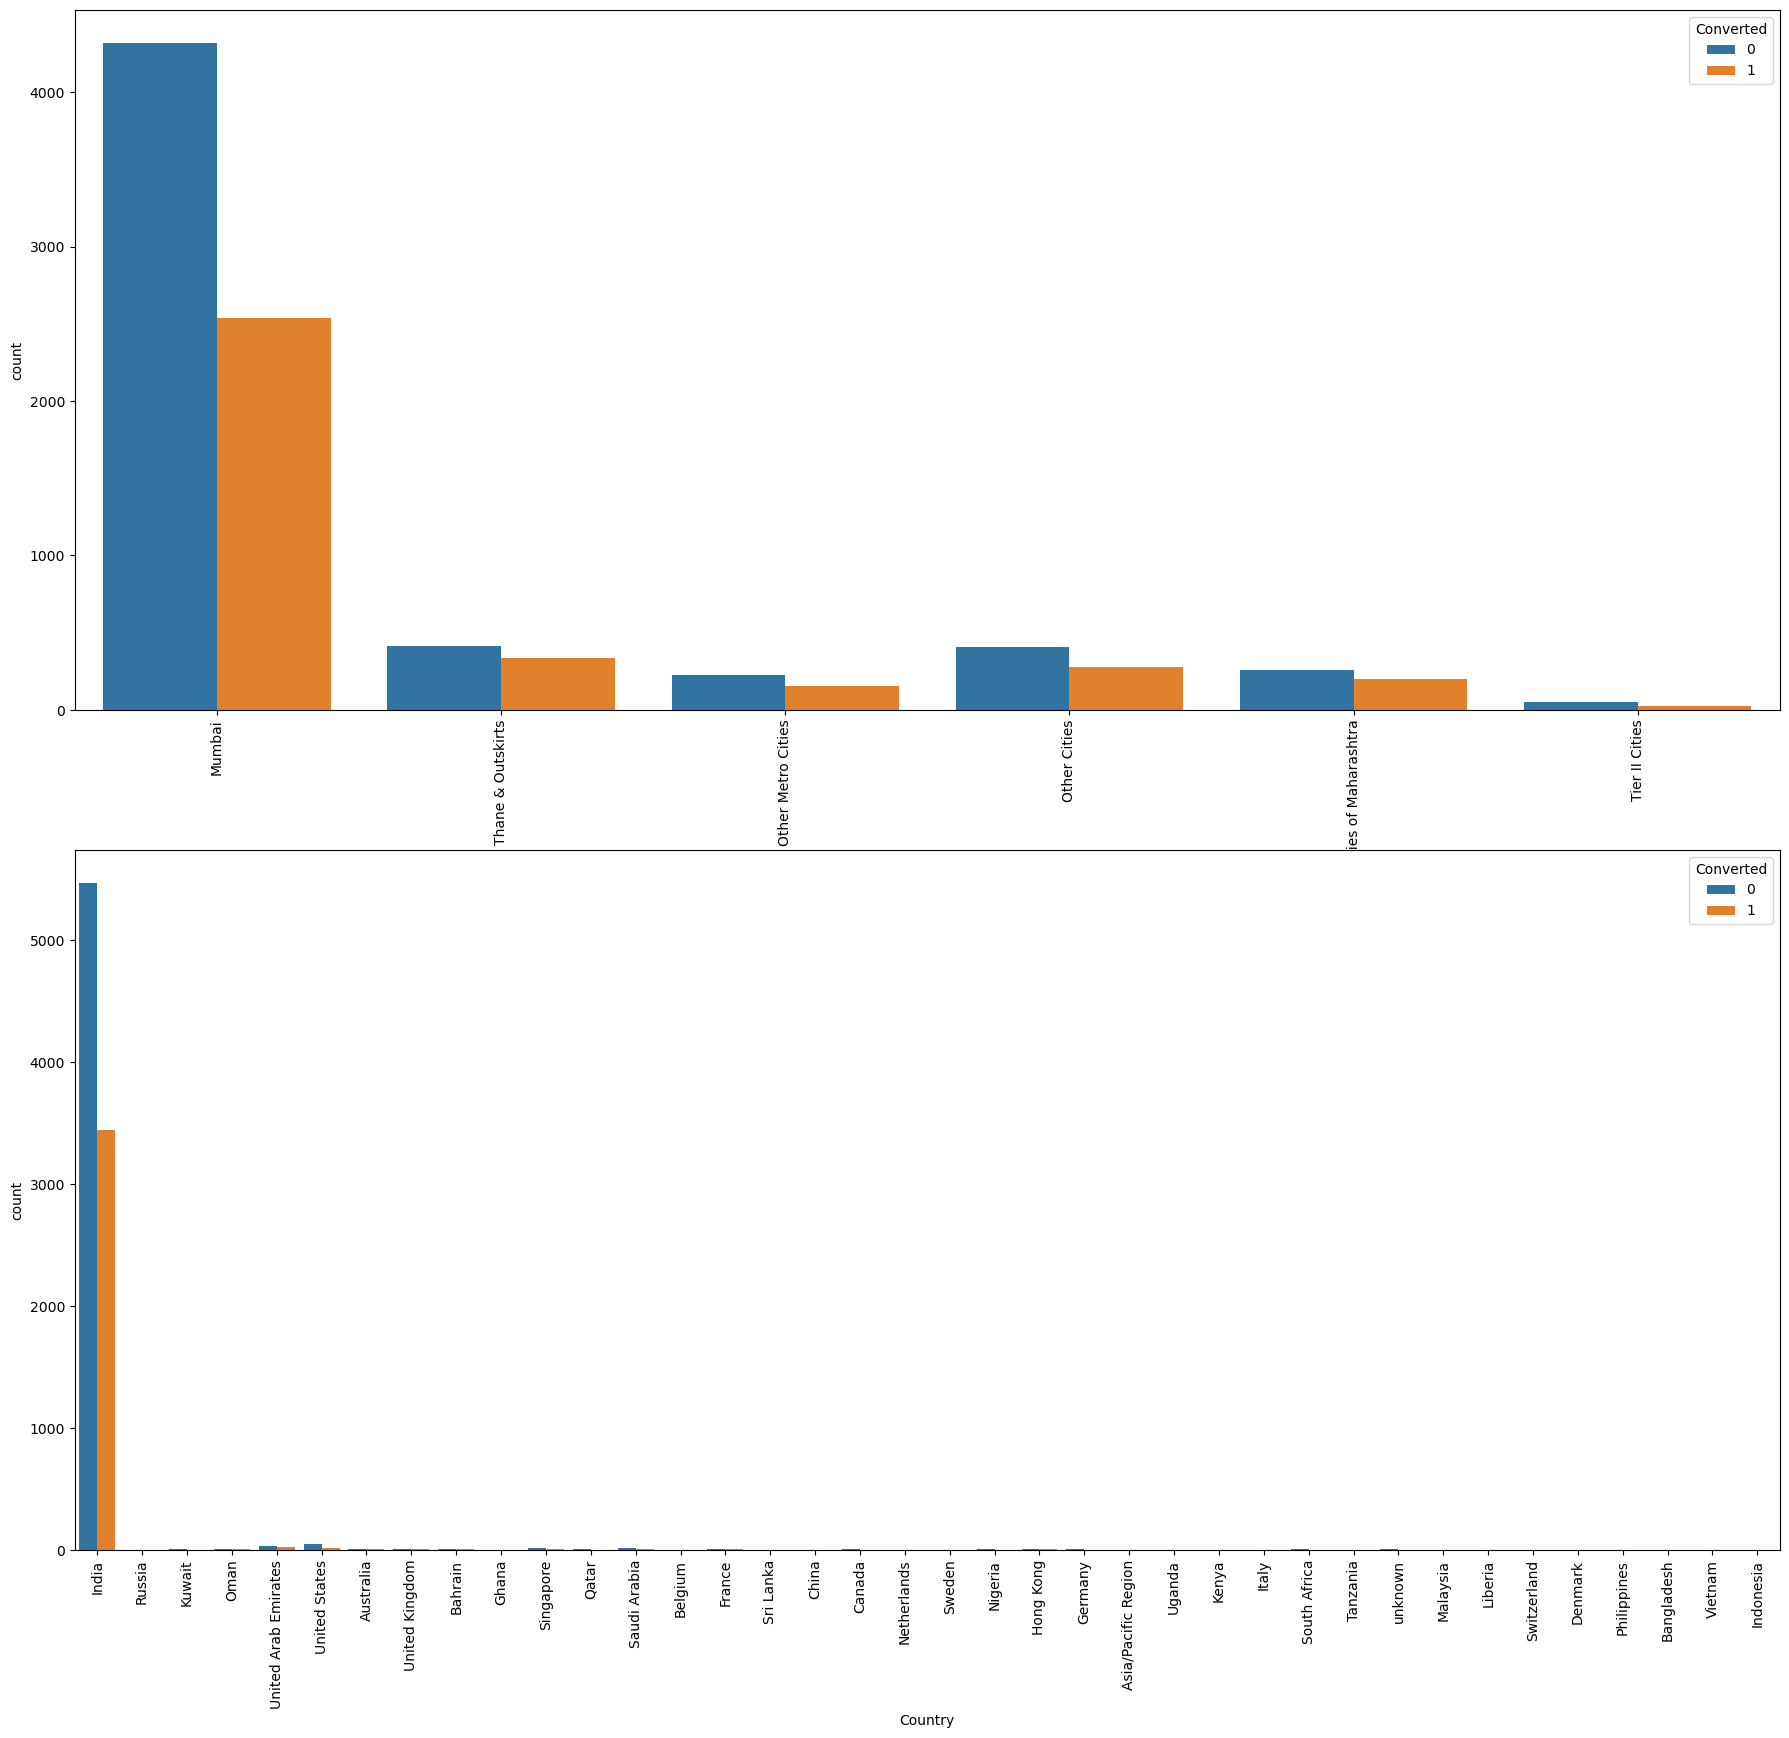

In [666]:
plt.figure(figsize=[22,20])
plt.subplot(2,1,1)
sns.countplot(df1,x='City',hue='Converted')
plt.xticks(rotation=90)
plt.subplot(2,1,2)
sns.countplot(df1,x='Country',hue='Converted')
plt.xticks(rotation=90)
plt.show()

Observation:

  * India has highest lead.mumbai is top in India and in cities.

Ad vs conversion

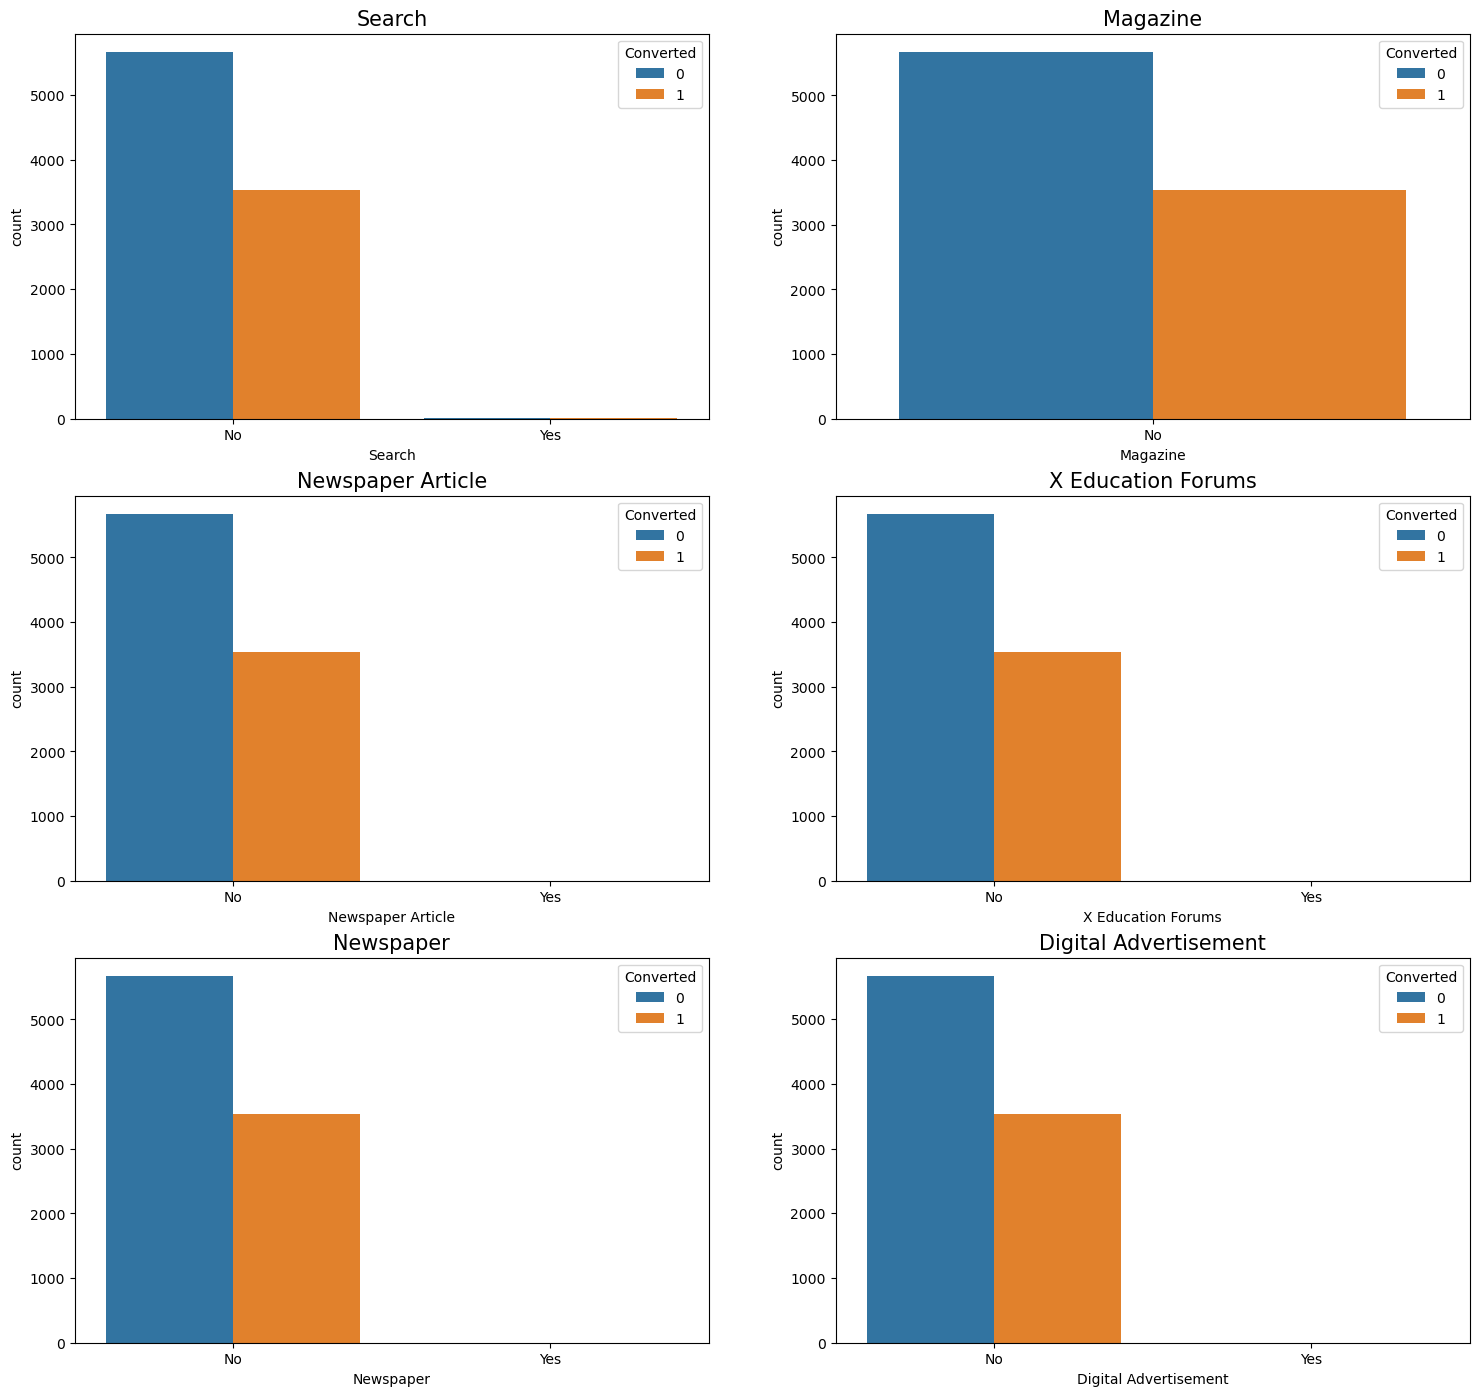

In [680]:
ad=['Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement']
cn=1
plt.figure(figsize=[18,17])
for i in ad:
    
    plt.subplot(3,2,cn)
    sns.countplot(df1,x=i,hue='Converted')
    plt.title(i,fontsize=15)
    cn=cn+1
    
plt.show()    

Observation:
    
  * No customers watch ads about educationX and their products in above platforms

Total Visits vs conversion

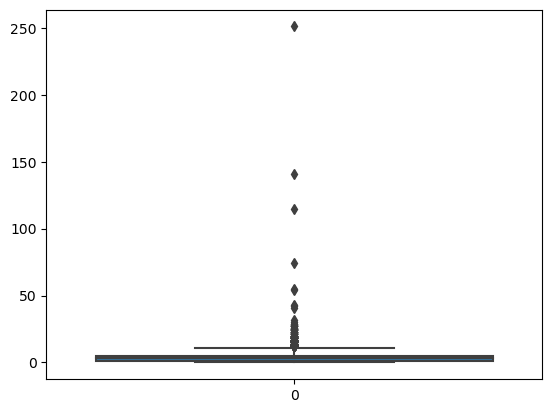

In [399]:
sns.boxplot(df1['TotalVisits']);

In [400]:
df1['TotalVisits'].describe()

count    9204.000000
mean        3.455876
std         4.824362
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

Observation:
    
   * outliers are avilable.So eliminate outliers to avoid effect of it.

In [401]:
q1=df1['TotalVisits'].quantile(0.90)

In [402]:
q1

7.0

In [416]:
df2=df1[df1['TotalVisits']<=q3]

<Axes: xlabel='Converted', ylabel='TotalVisits'>

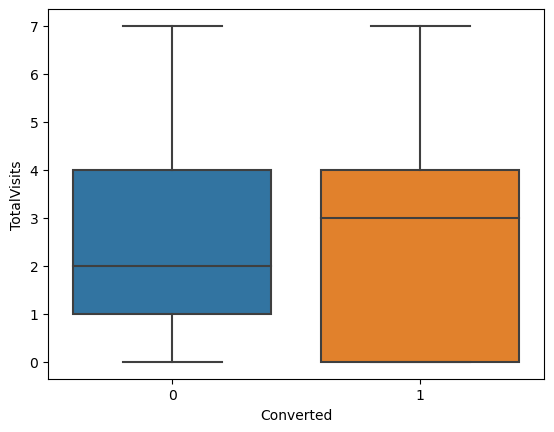

In [417]:
sns.boxplot(df2,x='Converted',y=
            'TotalVisits')

Observation:
    
   * Median in converted customers higher compared with non converted customers

Total Time Spent on Website vs converion

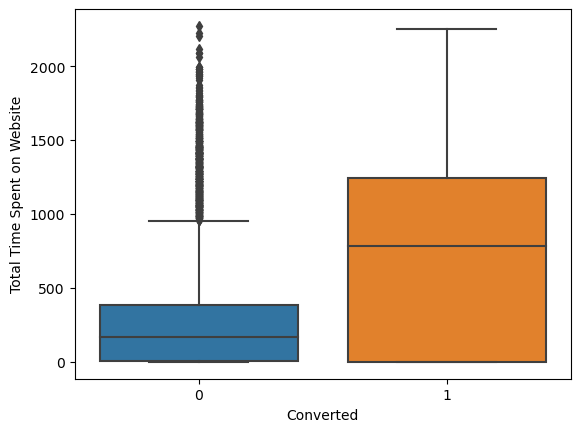

In [418]:
sns.boxplot(df2,x='Converted',y='Total Time Spent on Website');

Observation:
    
  * customers who spent more time are converted customers

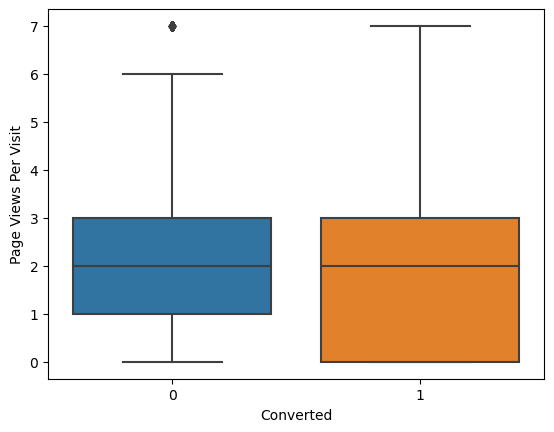

In [419]:
sns.boxplot(df2,x='Converted',y='Page Views Per Visit');

# Data Preperation

#### Converting some binary variables (Yes/No) to 0/1

In [420]:
df2.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,India,Finance Management,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,India,Finance Management,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,India,Finance Management,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,No,No,Modified


In [421]:
df2.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [422]:
df2[['Do Not Email', 'Do Not Call','Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content','I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview']]=df2[['Do Not Email', 'Do Not Call','Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content','I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview']].apply(lambda x:x.map({'No':0,'Yes':1}))

In [423]:
df2.head()   

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0,0.0,0,0.0,India,Finance Management,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,0,0,Mumbai,0,0,Modified
1,API,Organic Search,0,0,0,5.0,674,2.5,India,Finance Management,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,0,0,Mumbai,0,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,India,Business Administration,Student,Better Career Prospects,0,0,0,0,0,0,0,0,0,0,Mumbai,0,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,India,Media and Advertising,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,0,0,Mumbai,0,0,Modified
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,India,Finance Management,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,0,0,Mumbai,0,0,Modified


In [425]:
df2['City'].unique()

array(['Mumbai', 'Thane & Outskirts', 'Other Cities',
       'Other Cities of Maharashtra', 'Other Metro Cities',
       'Tier II Cities'], dtype=object)

In [411]:
df2[['Do Not Email', 'Do Not Call','Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content','I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview']].describe()

,Do Not Email,Do Not Call,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview
count,8349.000000,8349.000000,8349.000000,8349.0,8349.0,8349.0,8349.0,8349.000000,8349.000000,8349.0,8349.0,8349.0,8349.0,8349.000000
mean,0.077734,0.000120,0.000479,0.0,0.0,0.0,0.0,0.000240,0.000240,0.0,0.0,0.0,0.0,0.290574
std,0.267768,0.010944,0.021884,0.0,0.0,0.0,0.0,0.015476,0.015476,0.0,0.0,0.0,0.0,0.454054
min,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
25%,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
50%,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
75%,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,1.000000
max,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,1.000000,1.000000,0.0,0.0,0.0,0.0,1.000000


In [412]:
df2.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0,0.0,0,0.0,India,Finance Management,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,0,0,Mumbai,0,0,Modified
1,API,Organic Search,0,0,0,5.0,674,2.5,India,Finance Management,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,0,0,Mumbai,0,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,India,Business Administration,Student,Better Career Prospects,0,0,0,0,0,0,0,0,0,0,Mumbai,0,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,India,Media and Advertising,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,0,0,Mumbai,0,0,Modified
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,India,Finance Management,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,0,0,Mumbai,0,0,Modified


# Create dummy variable

In [426]:
df2.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [448]:
df3=pd.get_dummies(df2,columns=['Lead Origin', 'Lead Source','Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course','City','Last Notable Activity'],dtype=int,drop_first=True)

In [449]:
df3.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Lead Source_google,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,1,2.0,1532,2.0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1.0,305,1.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,1,2.0,1428,1.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0

# Split data to train and test data

In [453]:
from sklearn.model_selection import train_test_split

In [454]:
df_train,df_test=train_test_split(df3,train_size=0.70,random_state=100)

In [456]:
df3.columns

Index(['Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Search',
       'Magazine', 'Newspaper Article', 'X Education Forums',
       ...
       'Last Notable Activity_Email Received',
       'Last Notable Activity_Form Submitted on Website',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_Resubscribed to emails',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed'],
      dtype='object', length=110)

Scaling the features

In [457]:
from sklearn.preprocessing import PowerTransformer

In [458]:
Scale=PowerTransformer()

In [459]:
df_train[['TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit']]=Scale.fit_transform(df_train[['TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit']])

In [461]:
df_train.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Lead Source_google,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
1308,0,0,1,-0.117925,0.064003,0.129196,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
901,0,0,1,0.755164,1.250993,1.070216,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
7129,0,0,0,0.347399,1.332695,-0.167801,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5914,0,0,1,0.347399,0.924000,0.638303,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
9001,0,0,0,-0.117925,-0.226124,0.129196,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,

In [462]:
df_test[['TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit']]=Scale.transform(df_test[['TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit']])

In [463]:
df_test.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Lead Source_google,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
4930,0,0,1,-0.117925,1.306748,0.129196,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1780,0,0,1,0.347399,0.649256,-0.167801,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2768,0,0,1,-1.406718,-1.423849,-1.403456,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2282,0,0,0,0.755164,-0.430063,0.129196,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3861,0,0,0,-0.117925,1.152674,0.129196,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,

In [464]:
X_train=df_train.drop('Converted',axis=1)

In [465]:
y_train=df_train['Converted']

In [466]:
X_test=df_test.drop('Converted',axis=1)

In [467]:
y_test=df_test['Converted']

In [468]:
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Lead Source_google,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
1308,0,0,-0.117925,0.064003,0.129196,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
901,0,0,0.755164,1.250993,1.070216,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
7129,0,0,0.347399,1.332695,-0.167801,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5914,0,0,0.347399,0.924000,0.638303,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
9001,0,0,-0.117925,-0.226124,0.129196,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [469]:
X_test.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Lead Source_google,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
4930,0,0,-0.117925,1.306748,0.129196,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1780,0,0,0.347399,0.649256,-0.167801,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2768,0,0,-1.406718,-1.423849,-1.403456,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2282,0,0,0.755164,-0.430063,0.129196,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3861,0,0,-0.117925,1.152674,0.129196,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

# Building the model

Import libraries for building model

In [474]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

#### model 1

In [476]:
X_sm=sm.add_constant(X_train)

In [478]:
lr=sm.GLM(y_train,X_sm,family=sm.families.Binomial())

In [479]:
lm=lr.fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5844
Model:                            GLM   Df Residuals:                     5748
Model Family:                Binomial   Df Model:                           95
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Fri, 15 Dec 2023   Deviance:                   1.6275e+05
Time:                        12:24:44   Pearson chi2:                 7.96e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                    5.756e+26    1.2e+19   4.81e+07      0.000    5.76e+26    5.76e+26
Do Not Email                                                            -7.199e+14   3.71e+06  -1.94e+08      0.000    -7.2e+14    -7.2e+14
Do Not Call                                                              4.954e+14   6.76e+07   7.33e+06      0.000    4.95e+14    4.95e+14
TotalVisits                                                              4.782e+13   2.29e+06   2.09e+07      0.000    4.78e+13    4.78e+13
Total Time Spent on Website                                              6.917e+14   1.44e+06   4.81e+08      0.000    6.92e+14    6.92e+14
Page Views Per Visit                                                    -2.817e+14   2.34e+06   -1.2e+08      0.000   -2.82e+14   -2.82e+14
Search                                                                   1.738e+15    3.9e+07   4.46e+07      0.000    1.74e+15    1.74e+15
Magazine                                                                 2.232e+24   4.64e+16   4.81e+07      0.000    2.23e+24    2.23e+24
Newspaper Article                                                       -2.012e+24   4.19e+16  -4.81e+07      0.000   -2.01e+24   -2.01e+24
X Education Forums                                                        6.48e+24   1.35e+17   4.81e+07      0.000    6.48e+24    6.48e+24
Newspaper                                                                2.956e+24   6.15e+16   4.81e+07      0.000    2.96e+24    2.96e+24
Digital Advertisement                                                    2.119e+24   4.41e+16   4.81e+07      0.000    2.12e+24    2.12e+24
Through Recommendations                                                  4.826e+24      1e+17   4.81e+07      0.000    4.83e+24    4.83e+24
Receive More Updates About Our Courses                                   4.416e+24   9.19e+16   4.81e+07      0.000    4.42e+24    4.42e+24
Update me on Supply Chain Content                                        1.866e+23   3.88e+15   4.81e+07      0.000    1.87e+23    1.87e+23
Get updates on DM Content                                                4.752e+24   9.89e+16   4.81e+07      0.000    4.75e+24    4.75e+24
I agree to pay the amount through cheque                                -5.031e+23   1.05e+16  -4.81e+07      0.000   -5.03e+23   -5.03e+23
A free copy of Mastering The Interview                                   8.366e+13   2.95e+06   2.84e+07      0.000    8.37e+13    8.37e+13
Lead Origin_Landing Page Submission                                      8.687e+13   3.21e+06   2.71e+07      0.000    8.69e+13    8.69e+13
Lea

In [486]:
VIF=pd.DataFrame()
VIF['Features']=X_train.columns
VIF['VIF']=[ variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
VIF.sort_values('VIF',ascending=False)

,Features,VIF
60,Country_Uganda,inf
63,Country_United States,inf
48,Country_Nigeria,inf
49,Country_Oman,inf
50,Country_Philippines,inf
51,Country_Qatar,inf
52,Country_Russia,inf
53,Country_Saudi Arabia,inf
54,Country_Singapore,inf
55,Country_South Africa,inf


Observation:
    
  *  VIF value is high in many features.So,Different features have multicollinearity.
  *  Build another model

#### model 2

In [487]:
Log=LogisticRegression()

In [488]:
Log.fit(X_train,y_train)

LogisticRegression()

In [489]:
rfe=RFE(Log,n_features_to_select=15)

In [490]:
rfe.fit(X_train,y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=15)

In [492]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 41),
 ('TotalVisits', False, 57),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 21),
 ('Search', False, 10),
 ('Magazine', False, 90),
 ('Newspaper Article', False, 89),
 ('X Education Forums', False, 93),
 ('Newspaper', False, 88),
 ('Digital Advertisement', False, 87),
 ('Through Recommendations', False, 95),
 ('Receive More Updates About Our Courses', False, 94),
 ('Update me on Supply Chain Content', False, 86),
 ('Get updates on DM Content', False, 85),
 ('I agree to pay the amount through cheque', False, 84),
 ('A free copy of Mastering The Interview', False, 64),
 ('Lead Origin_Landing Page Submission', False, 42),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 8),
 ('Lead Source_Facebook', False, 31),
 ('Lead Source_Google', False, 22),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 23),
 ('Lead Source_Others', False, 29),
 ('Lead Source_

In [493]:
col=X_train.columns[rfe.support_]

In [494]:
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Country_Saudi Arabia', 'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed'],
      dtype='object')

In [495]:
X_train1=X_train[col]

In [497]:
X_train1.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Country_Saudi Arabia,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
1308,0,0.064003,0,0,0,0,0,0,0,1,0,0,0,0,0
901,0,1.250993,0,0,0,0,0,0,0,1,0,0,0,0,0
7129,0,1.332695,0,1,0,0,0,0,0,1,0,0,0,0,0
5914,0,0.924000,0,0,0,0,0,0,0,1,0,0,0,0,0
9001,0,-0.226124,0,0,0,0,0,0,0,1,0,0,0,0,0


In [498]:
X_sm1=sm.add_constant(X_train1)

In [499]:
lr1=sm.GLM(y_train,X_sm1,family=sm.families.Binomial())
lm1=lr1.fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5844
Model:                            GLM   Df Residuals:                     5828
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2532.7
Date:                Fri, 15 Dec 2023   Deviance:                       5065.3
Time:                        12:36:00   Pearson chi2:                 1.07e+04
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3707
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                              0.6224      0.185      3.355      0.001       0.259       0.986
Do Not Email                                      -1.5701      0.182     -8.633      0.000      -1.927      -1.214
Total Time Spent on Website                        1.5307      0.066     23.104      0.000       1.401       1.661
Lead Origin_Lead Add Form                          4.1326      0.955      4.326      0.000       2.260       6.005
Lead Source_Olark Chat                             2.5352      0.157     16.132      0.000       2.227       2.843
Lead Source_Reference                              1.3090      0.966      1.355      0.175      -0.584       3.202
Lead Source_Welingak Website                       3.5816      1.194      2.999      0.003       1.241       5.922
Country_Saudi Arabia                             -23.4605   1.87e+04     -0.001      0.999   -3.67e+04    3.67e+04
What is your current occupation_Housewife         21.8789   2.19e+04      0.001      0.999    -4.3e+04     4.3e+04
What is your current occupation_Student           -2.4280      0.287     -8.467      0.000      -2.990      -1.866
What is your current occupation_Unemployed        -2.6746      0.186    -14.399      0.000      -3.039      -2.311
Last Notable Activity_Had a Phone Conversation     3.3165      1.132      2.929      0.003       1.097       5.536
Last Notable Activity_Olark Chat Conversation     -1.6036      0.401     -4.000      0.000      -2.389      -0.818
Last Notable Activity_SMS Sent                     1.7716      0.081     21.945      0.000       1.613       1.930
Last Notable Activity_Unreachable                  2.0598      0.626      3.291      0.001       0.833       3.286
Last Notable Activity_Unsubscribed                 1.4179      0.516      2.750      0.006       0.407       2.429
==================================================================================================================
"""

In [500]:
VIF=pd.DataFrame()
VIF['Features']=X_train1.columns
VIF['VIF']=[ variance_inflation_factor(X_train1.values,i) for i in range(X_train1.shape[1])]
VIF.sort_values('VIF',ascending=False)

,Features,VIF
2,Lead Origin_Lead Add Form,63.239470
4,Lead Source_Reference,50.074768
5,Lead Source_Welingak Website,14.033817
3,Lead Source_Olark Chat,2.630443
1,Total Time Spent on Website,2.224551
9,What is your current occupation_Unemployed,2.037110
12,Last Notable Activity_SMS Sent,1.301099
0,Do Not Email,1.167330
14,Last Notable Activity_Unsubscribed,1.074172
11,Last Notable Activity_Olark Chat Conversation,1.051975


Observation:

  *  P-Value is greter than 0.05 in some parameters.so coeffiecients are insignificant for those variables. 
  *  VIF value is high in many features.So,Different features have multicollinearity.
  *  Build another model

#### model 3

In [502]:
X_train2=X_train1.drop('Country_Saudi Arabia',axis=1)

In [503]:
X_sm2=sm.add_constant(X_train2)

In [504]:
lr2=sm.GLM(y_train,X_sm2,family=sm.families.Binomial())

In [505]:
lm2=lr2.fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5844
Model:                            GLM   Df Residuals:                     5829
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2538.4
Date:                Fri, 15 Dec 2023   Deviance:                       5076.8
Time:                        12:40:19   Pearson chi2:                 1.07e+04
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3694
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                              0.6276      0.185      3.387      0.001       0.264       0.991
Do Not Email                                      -1.5655      0.182     -8.611      0.000      -1.922      -1.209
Total Time Spent on Website                        1.5211      0.066     23.081      0.000       1.392       1.650
Lead Origin_Lead Add Form                          4.1178      0.955      4.314      0.000       2.247       5.989
Lead Source_Olark Chat                             2.5138      0.156     16.076      0.000       2.207       2.820
Lead Source_Reference                              1.3086      0.965      1.356      0.175      -0.583       3.201
Lead Source_Welingak Website                       3.5804      1.194      3.000      0.003       1.241       5.920
What is your current occupation_Housewife         20.8714   1.33e+04      0.002      0.999   -2.61e+04    2.61e+04
What is your current occupation_Student           -2.4578      0.286     -8.585      0.000      -3.019      -1.897
What is your current occupation_Unemployed        -2.6763      0.186    -14.421      0.000      -3.040      -2.313
Last Notable Activity_Had a Phone Conversation     3.3146      1.132      2.928      0.003       1.096       5.533
Last Notable Activity_Olark Chat Conversation     -1.6338      0.398     -4.101      0.000      -2.415      -0.853
Last Notable Activity_SMS Sent                     1.7700      0.081     21.969      0.000       1.612       1.928
Last Notable Activity_Unreachable                  2.0599      0.625      3.294      0.001       0.834       3.286
Last Notable Activity_Unsubscribed                 1.4164      0.515      2.748      0.006       0.406       2.426
==================================================================================================================
"""

In [506]:
VIF=pd.DataFrame()
VIF['Features']=X_train2.columns
VIF['VIF']=[ variance_inflation_factor(X_train2.values,i) for i in range(X_train2.shape[1])]
VIF.sort_values('VIF',ascending=False)

,Features,VIF
2,Lead Origin_Lead Add Form,63.239247
4,Lead Source_Reference,50.074759
5,Lead Source_Welingak Website,14.033817
3,Lead Source_Olark Chat,2.630243
1,Total Time Spent on Website,2.224549
8,What is your current occupation_Unemployed,2.033947
11,Last Notable Activity_SMS Sent,1.301086
0,Do Not Email,1.167090
13,Last Notable Activity_Unsubscribed,1.074172
10,Last Notable Activity_Olark Chat Conversation,1.051491


Observation:

  *  P-Value is greter than 0.05 in some parameters.so coeffiecients are insignificant for those variables. 
  *  VIF value is high in many features.So,Different features have multicollinearity.
  *  Build another model

#### Model 4

In [508]:
X_train3=X_train2.drop('What is your current occupation_Housewife',axis=1)

In [509]:
X_sm3=sm.add_constant(X_train3)

In [510]:
lr3=sm.GLM(y_train,X_sm3,family=sm.families.Binomial())

In [511]:
lm3=lr3.fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5844
Model:                            GLM   Df Residuals:                     5830
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2540.0
Date:                Fri, 15 Dec 2023   Deviance:                       5080.0
Time:                        12:50:07   Pearson chi2:                 1.08e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3691
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                              0.6673      0.185      3.609      0.000       0.305       1.030
Do Not Email                                      -1.5665      0.182     -8.616      0.000      -1.923      -1.210
Total Time Spent on Website                        1.5187      0.066     23.081      0.000       1.390       1.648
Lead Origin_Lead Add Form                          4.1128      0.954      4.310      0.000       2.243       5.983
Lead Source_Olark Chat                             2.5077      0.156     16.058      0.000       2.202       2.814
Lead Source_Reference                              1.3064      0.965      1.354      0.176      -0.585       3.198
Lead Source_Welingak Website                       3.5801      1.193      3.000      0.003       1.241       5.919
What is your current occupation_Student           -2.4950      0.286     -8.719      0.000      -3.056      -1.934
What is your current occupation_Unemployed        -2.7135      0.185    -14.633      0.000      -3.077      -2.350
Last Notable Activity_Had a Phone Conversation     3.3123      1.132      2.927      0.003       1.094       5.531
Last Notable Activity_Olark Chat Conversation     -1.6349      0.399     -4.101      0.000      -2.416      -0.854
Last Notable Activity_SMS Sent                     1.7685      0.081     21.951      0.000       1.611       1.926
Last Notable Activity_Unreachable                  2.0566      0.626      3.288      0.001       0.830       3.283
Last Notable Activity_Unsubscribed                 1.4137      0.516      2.740      0.006       0.402       2.425
==================================================================================================================
"""

In [512]:
VIF=pd.DataFrame()
VIF['Features']=X_train3.columns
VIF['VIF']=[ variance_inflation_factor(X_train3.values,i) for i in range(X_train3.shape[1])]
VIF.sort_values('VIF',ascending=False)

,Features,VIF
2,Lead Origin_Lead Add Form,63.238854
4,Lead Source_Reference,50.072782
5,Lead Source_Welingak Website,14.033755
3,Lead Source_Olark Chat,2.626538
1,Total Time Spent on Website,2.218978
7,What is your current occupation_Unemployed,2.032746
10,Last Notable Activity_SMS Sent,1.300934
0,Do Not Email,1.167082
12,Last Notable Activity_Unsubscribed,1.074171
9,Last Notable Activity_Olark Chat Conversation,1.051487


Observation:

  *  P-Value is greter than 0.05 in some parameters.so coeffiecients are insignificant for those variables. 
  *  VIF value is high in many features.So,Different features have multicollinearity.
  *  Build another model

#### Model 5

In [514]:
X_train4=X_train3.drop('Lead Source_Reference',axis=1)

In [515]:
X_sm4=sm.add_constant(X_train4)

In [516]:
lr4=sm.GLM(y_train,X_sm4,family=sm.families.Binomial())
lm4=lr4.fit()
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5844
Model:                            GLM   Df Residuals:                     5831
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2540.8
Date:                Fri, 15 Dec 2023   Deviance:                       5081.6
Time:                        12:58:30   Pearson chi2:                 1.06e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3689
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                              0.6694      0.185      3.621      0.000       0.307       1.032
Do Not Email                                      -1.5641      0.182     -8.612      0.000      -1.920      -1.208
Total Time Spent on Website                        1.5182      0.066     23.070      0.000       1.389       1.647
Lead Origin_Lead Add Form                          5.3758      0.234     22.967      0.000       4.917       5.835
Lead Source_Olark Chat                             2.5065      0.156     16.044      0.000       2.200       2.813
Lead Source_Welingak Website                       2.3158      0.752      3.081      0.002       0.843       3.789
What is your current occupation_Student           -2.4937      0.286     -8.724      0.000      -3.054      -1.933
What is your current occupation_Unemployed        -2.7155      0.185    -14.650      0.000      -3.079      -2.352
Last Notable Activity_Had a Phone Conversation     3.3121      1.132      2.926      0.003       1.094       5.530
Last Notable Activity_Olark Chat Conversation     -1.6339      0.398     -4.100      0.000      -2.415      -0.853
Last Notable Activity_SMS Sent                     1.7683      0.081     21.949      0.000       1.610       1.926
Last Notable Activity_Unreachable                  2.0577      0.625      3.291      0.001       0.832       3.283
Last Notable Activity_Unsubscribed                 1.4113      0.516      2.736      0.006       0.400       2.422
==================================================================================================================
"""

In [517]:
VIF=pd.DataFrame()
VIF['Features']=X_train4.columns
VIF['VIF']=[ variance_inflation_factor(X_train4.values,i) for i in range(X_train4.shape[1])]
VIF.sort_values('VIF',ascending=False)

,Features,VIF
3,Lead Source_Olark Chat,2.624558
1,Total Time Spent on Website,2.217732
6,What is your current occupation_Unemployed,2.032726
2,Lead Origin_Lead Add Form,1.627743
9,Last Notable Activity_SMS Sent,1.300529
4,Lead Source_Welingak Website,1.268203
0,Do Not Email,1.167015
11,Last Notable Activity_Unsubscribed,1.074171
8,Last Notable Activity_Olark Chat Conversation,1.051432
5,What is your current occupation_Student,1.032210


Observation:
    
  * P-value of all features is less than 0.05>So,all coefficients are significant.

  * VIF value is less than 5.So,There is no multicollinearity between features.

Probabilty

In [518]:
y_pred_prob=lm4.predict(X_sm4)

In [522]:
Final_train_df=pd.DataFrame({'Actual':y_train.values,'Probability':y_pred_prob.values.reshape(-1)})

In [657]:
Final_train_df.head()

,Actual,Probability,Lead_score,Predicted
0,1,0.124675,12,0
1,1,0.463381,46,1
2,0,0.922996,92,1
3,1,0.344525,34,0
4,0,0.083987,8,0


# Lead score

* Assign lead score to each customers with values between 0 and 100

In [528]:
Final_train_df['Lead_score']=round(Final_train_df['Probability']*100)

In [656]:
Final_train_df.head()

,Actual,Probability,Lead_score,Predicted
0,1,0.124675,12,0
1,1,0.463381,46,1
2,0,0.922996,92,1
3,1,0.344525,34,0
4,0,0.083987,8,0


In [530]:
Final_train_df['Lead_score']=Final_train_df['Lead_score'].apply(lambda x:int(x))

In [532]:
Final_train_df.head()

,Actual,Probability,Lead_score
0,1,0.124675,12
1,1,0.463381,46
2,0,0.922996,92
3,1,0.344525,34
4,0,0.083987,8


# Model Evaluation

import libraries for model evaluation

In [575]:
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import confusion_matrix,precision_score,recall_score,accuracy_score

First,consider the threshold value is 0.5

#### Sigmoid Curve

In [539]:
def draw_roc(actual,prob):
    fpr,tpr,thresholds=roc_curve(actual,prob,drop_intermediate=False)
    auc_score=roc_auc_score(actual,prob)
    plt.plot(fpr,tpr,label='ROC area(area=%0.2f)' % auc_score)
    plt.plot([0,1],[0,1],'--')
    plt.title('ROC Curve')
    plt.xlabel('fpr/1-specificity')
    plt.ylabel('tpr')
    plt.legend(loc='lower right')
    plt.show()
    
    return None

In [540]:
Actual=Final_train_df['Actual']

In [541]:
Probability=Final_train_df['Probability']

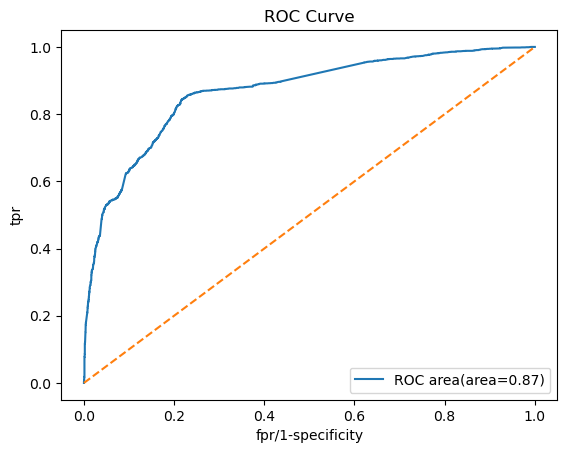

In [542]:
draw_roc(Actual,Probability)

Observation:
    
  * Area under ROC curve is 0.87.So,the model is good one

## Evaluation Metrics

In [534]:
Final_train_df['Predicted']=Final_train_df['Probability'].apply(lambda x: 1 if x>0.5 else 0)

In [535]:
Final_train_df.head()

,Actual,Probability,Lead_score,Predicted
0,1,0.124675,12,0
1,1,0.463381,46,0
2,0,0.922996,92,1
3,1,0.344525,34,0
4,0,0.083987,8,0


In [584]:
Actual=Final_train_df['Actual']

In [543]:
Predicted=Final_train_df['Predicted']

In [570]:
confusion_matrix=confusion_matrix(Actual,Predicted)

In [545]:
confusion_matrix

array([[3243,  370],
       [ 807, 1424]], dtype=int64)

In [ ]:
# Not converted/
# Converted         Not Converted  Converted

#Not converted      3243           370

#Converted          807            1424

In [546]:
TN=confusion_matrix[0,0]
FP=confusion_matrix[0,1]
FN=confusion_matrix[1,0]
TP=confusion_matrix[1,1]

### Sesitivity vs Specificity vs Accuracy

In [585]:
Sensitivity=TP/(TP+FN)

In [586]:
specificity=TN/(TN+FP)

In [587]:
Accuracy=accuracy_score(Actual,Predicted)

In [588]:
print('Sensitivity   :',Sensitivity)
print('Specificity   :',specificity)
print('Accuracy      :',Accuracy)

Sensitivity   : 0.2545943523083819
Specificity   : 0.9892056462773319
Accuracy      : 0.7985968514715948


### Precision vs Recall

In [551]:
Precision=precision_score(Actual,Predicted)
Recall=recall_score(Actual,Predicted)

In [552]:
print('Precision   :',Precision)
print('Recall      :',Recall)

Precision   : 0.7937569676700111
Recall      : 0.6382787987449574


## Optimum Threshold

In [563]:
Final_train_df['Pred']=Final_train_df['Probability'].apply(lambda x: 1 if x>0.3 else 0)


In [572]:
Final_train_df.drop('Pred',axis=1,inplace=True)

In [573]:
Thresholds=[float(i/10) for i in range(10)]
Thresholds

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [577]:
from sklearn import metrics

In [579]:


cutoff_df=pd.DataFrame(columns=['Cut-off','Accuracy','sensitivity','specificity','precision','recall'])
for i in Thresholds:
    Final_train_df['Pred']=Final_train_df['Probability'].apply(lambda x: 1 if x>i else 0)
    CM=metrics.confusion_matrix(Final_train_df['Actual'],Final_train_df['Pred'])
    TN=CM[0,0]
    FP=CM[0,1]
    FN=CM[1,0]
    TP=CM[1,1]
    SN=TP/(TP+FN)
    SP=TN/(TN+FP)
    PR=precision_score(Actual,Final_train_df['Pred'])
    RE=recall_score(Actual,Final_train_df['Pred'])
    ACC=accuracy_score(Actual,Final_train_df['Pred'])
    cutoff_df.loc[i]=[i,ACC,SN,SP,PR,RE]

In [580]:
cutoff_df

,Cut-off,Accuracy,sensitivity,specificity,precision,recall
0.0,0.0,0.381759,1.000000,0.000000,0.381759,1.000000
0.1,0.1,0.518823,0.976244,0.236369,0.441159,0.976244
0.2,0.2,0.751027,0.876289,0.673678,0.623803,0.876289
0.3,0.3,0.803217,0.854774,0.771381,0.697768,0.854774
0.4,0.4,0.799452,0.765576,0.820371,0.724650,0.765576
0.5,0.5,0.798597,0.638279,0.897592,0.793757,0.638279
0.6,0.6,0.787645,0.542806,0.938832,0.845670,0.542806
0.7,0.7,0.788843,0.522187,0.953501,0.873968,0.522187
0.8,0.8,0.754107,0.396683,0.974813,0.906762,0.396683
0.9,0.9,0.708761,0.254594,0.989206,0.935750,0.254594


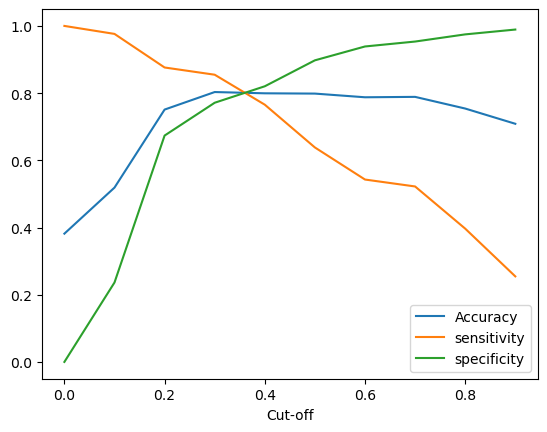

In [591]:
cutoff_df.plot.line(x='Cut-off',y=['Accuracy','sensitivity','specificity']);

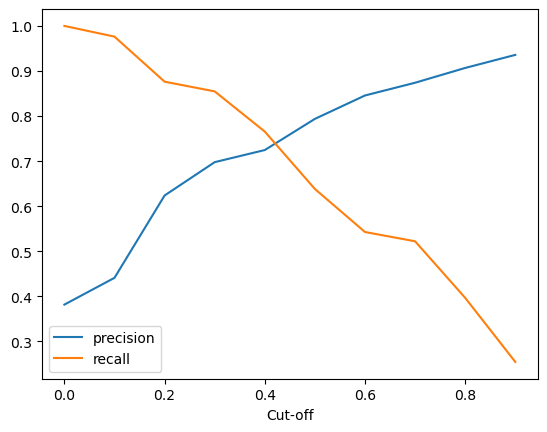

In [592]:
cutoff_df.plot.line(x='Cut-off',y=['precision','recall']);

Observation:
    
* intersection point in specificit vs accuracy vs sensitivity is between 0.3 and 0.4.so,take 0.3 /0.4 based on considering sensitivity,specificity and accuracy are as metrics
* intersection point in precision vs recalll is 0.4.so,take 0.4 based on considering precision and recall are as metrics

# Evaluation on Test Data

In [597]:
X_train4.columns

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed'],
      dtype='object')

In [599]:
X_test_final=X_test[['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed']]

In [628]:
Final_train_df['Predicted']=Final_train_df['Probability'].apply(lambda x: 1 if x>0.3 else 0)

In [629]:
CM_train=confusion_matrix(Final_train_df['Actual'],Final_train_df['Predicted'])

In [630]:
TN1=CM_train[0,0]
FP1=CM_train[0,1]
FN1=CM_train[1,0] 
TP1=CM_train[1,1]

In [631]:
Sensitivity1=TP1/(TP1+FN1)
Specificity1=TN1/(TN1+FP1)
Accuracy1=accuracy_score(Final_train_df['Actual'],Final_train_df['Predicted_Spec/Sen/Acc'])
Precision1=precision_score(Final_train_df['Actual'],Final_train_df['Predicted_Spec/Sen/Acc'])
Recall1=recall_score(Final_train_df['Actual'],Final_train_df['Predicted_Spec/Sen/Acc'])

In [612]:
y_test_pred=lm4.predict(sm.add_constant(X_test_final))

In [613]:
Final_test_df=pd.DataFrame({'Actual':y_test.values,'Probability':y_test_pred.values.reshape(-1)})

In [614]:
Final_test_df.head()

,Actual,Probability
0,1,0.484483
1,1,0.998683
2,1,0.154288
3,0,0.063033
4,0,0.426533


In [641]:
Final_test_df['Predicted']=Final_test_df['Probability'].apply(lambda x:1 if x>0.3 else 0)

In [617]:
Final_test_df.head()

,Actual,Probability,Predicted
0,1,0.484483,1
1,1,0.998683,1
2,1,0.154288,0
3,0,0.063033,0
4,0,0.426533,1


In [618]:
CM_test=confusion_matrix(Final_test_df['Actual'],Final_test_df['Predicted'])

In [619]:
TN_test=CM_test[0,0]
FP_test=CM_test[0,1]
FN_test=CM_test[1,0]
TP_test=CM_test[1,1]

In [620]:
Sensitivity_test=TP_test/(TP_test+FN_test)
Specificity_test=TN_test/(TN_test+FP_test)
Accuracy_test=accuracy_score(Final_test_df['Actual'],Final_test_df['Predicted'])

In [623]:
Precision_test=precision_score(Final_test_df['Actual'],Final_test_df['Predicted'])
Recall_test=recall_score(Final_test_df['Actual'],Final_test_df['Predicted'])

In [639]:
Final_train_df.head()

,Actual,Probability,Lead_score,Predicted,Pred,Predicted_Spec/Sen/Acc
0,1,0.124675,12,0,0,0
1,1,0.463381,46,1,1,1
2,0,0.922996,92,1,1,1
3,1,0.344525,34,1,0,0
4,0,0.083987,8,0,0,0


In [642]:
Final_train_df.columns

Index(['Actual', 'Probability', 'Lead_score', 'Predicted', 'Pred',
       'Predicted_Spec/Sen/Acc'],
      dtype='object')

In [643]:
Final_train_df.drop(['Pred',
       'Predicted_Spec/Sen/Acc'],axis=1,inplace=True)

In [644]:
Final_train_df.head()

,Actual,Probability,Lead_score,Predicted
0,1,0.124675,12,0
1,1,0.463381,46,1
2,0,0.922996,92,1
3,1,0.344525,34,0
4,0,0.083987,8,0


In [645]:
Final_test_df.columns

Index(['Actual', 'Probability', 'Predicted', 'Pred'], dtype='object')

In [646]:
Final_test_df.drop('Pred',axis=1,inplace=True)

In [647]:
Final_test_df.head()

,Actual,Probability,Predicted
0,1,0.484483,1
1,1,0.998683,1
2,1,0.154288,0
3,0,0.063033,0
4,0,0.426533,1


In [648]:
Final_test_df['Score']=round(Final_test_df['Probability']*100)

In [649]:
Final_test_df.head()

,Actual,Probability,Predicted,Score
0,1,0.484483,1,48.0
1,1,0.998683,1,100.0
2,1,0.154288,0,15.0
3,0,0.063033,0,6.0
4,0,0.426533,1,43.0


In [650]:
Final_test_df['Score']=Final_test_df['Score'].apply(lambda x: int(x))

In [651]:
Final_test_df.head()

,Actual,Probability,Predicted,Score
0,1,0.484483,1,48
1,1,0.998683,1,100
2,1,0.154288,0,15
3,0,0.063033,0,6
4,0,0.426533,1,43


In [652]:
X_train4.columns

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed'],
      dtype='object')

### Metrics of train data & Test data

In [632]:
print("🕵️‍♀️Train")
print('-'*10)
print('Sensitivity     :',Sensitivity1)
print('Specificity     :',Specificity1)
print('Accuracy        :',Accuracy1)
print('Precision       :',Precision1)
print('Recall          :',Recall1)
print('*'*100)
print('*'*100)

print('🕵️‍♀️Test')
print('-'*10)
print('Sensitivity     :',Sensitivity_test)
print('Specificity     :',Specificity_test)
print('Accuracy        :',Accuracy_test)
print('Precision       :',Precision_test)
print('Recall          :',Recall_test)



🕵️‍♀️Train
----------
Sensitivity     : 0.8547736441057822
Specificity     : 0.7713811237199003
Accuracy        : 0.7994524298425736
Precision       : 0.7246499787865931
Recall          : 0.7655759748991484
****************************************************************************************************
****************************************************************************************************
🕵️‍♀️Test
----------
Sensitivity     : 0.8261351052048727
Specificity     : 0.7827715355805244
Accuracy        : 0.7984031936127745
Precision       : 0.6819012797074955
Recall          : 0.8261351052048727


### Observation:
    
 * Slight variation in evaluation metrics between train and test data.So,the model is best model
 * Model  predicts conversion rate as well
 * Model find hot leads which may help to enhance the conversion rate 
 * In business terms, this model has an ability to adjust with the company’s requirements in coming future.
 
========================================================================================

Significant features for Predict conversion rate
  
 * Do Not Email
 * Total Time Spent on Website
 * Lead Origin_Lead Add Form
 * Lead Source_Olark Chat
 * Lead Source_Welingak Website
 * What is your current occupation_Student
 * What is your current occupation_Unemployed
 * Last Notable Activity_Had a Phone Conversation
 * Last Notable Activity_Olark Chat Conversation
 * Last Notable Activity_SMS Sent
 * Last Notable Activity_Unreachable
 * Last Notable Activity_Unsubscribed
 